In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Groupby
If you have large datasets groupby is your friend.  It helps you break up your data. I am going to give you some examples that might come in handy.  I have Iron and Arsenic data I made up from three locations with different weather.  Look at the data.

In [3]:
df=pd.read_excel('groupby.xlsx',index_col='Date',parse_dates=True)

In [4]:
df

,Location,Weather,Iron,Arsenic
Date,,,,
2016-01-01,1,sunny,54,1
2016-02-01,1,cloudy,53,1
2016-03-01,1,rain,52,1
2016-04-01,1,fog,51,1
2016-05-01,1,sunny,50,1
2016-06-01,1,cloudy,49,1
2016-07-01,1,rain,48,1
2016-08-01,1,fog,47,1
2016-09-01,1,sunny,46,1


We can describe all the data!

In [5]:
df.describe()

,Location,Iron,Arsenic
count,30.000000,30.000000,30.000000
mean,2.000000,23.166667,6.366667
std,0.830455,19.461870,8.027897
min,1.000000,5.000000,1.000000
25%,1.000000,5.000000,1.000000
50%,2.000000,15.000000,1.500000
75%,3.000000,46.750000,10.000000
max,3.000000,54.000000,30.000000


In [6]:
df.mean()

Location     2.000000
Iron        23.166667
Arsenic      6.366667
dtype: float64

## suppose you want the data by location??

In [7]:
df.groupby('Location').mean()

,Iron,Arsenic
Location,,
1,49.5,1.0
2,5.0,13.2
3,15.0,4.9


In [8]:
df.groupby('Weather').mean()

,Location,Iron,Arsenic
Weather,,,
cloudy,2.0,23.000000,8.222222
fog,2.0,23.000000,6.333333
rain,2.0,23.333333,5.333333
sunny,2.0,23.333333,5.222222


In [16]:
df.groupby(['Location','Weather']).mean()

Iron    Arsenic
Location Weather                 
1        cloudy   49.0   1.000000
         fog      49.0   1.000000
         rain     50.0   1.000000
         sunny    50.0   1.000000
2        cloudy    5.0  18.333333
         fog       5.0  15.000000
         rain      5.0   9.500000
         sunny     5.0   9.333333
3        cloudy   15.0   5.333333
         fog      15.0   3.000000
         rain     15.0   5.500000
         sunny    15.0   5.333333

### You can also do some math between all the data and the group. If you want to look at the percent of weather in each group.  
First can we do % in each weather group?

In [41]:
df['Weather'].value_counts()/df['Weather'].count()*100

cloudy    30.0
sunny     30.0
rain      20.0
fog       20.0
Name: Weather, dtype: float64

### But we want to see if weather by location we can use groupby

In [42]:
df.groupby(['Location'])['Weather'].value_counts()

Location  Weather
1         cloudy     3
          sunny      3
          fog        2
          rain       2
2         cloudy     3
          sunny      3
          fog        2
          rain       2
3         cloudy     3
          sunny      3
          fog        2
          rain       2
Name: Weather, dtype: int64

## But lets now turn it into a %.  You need to choose your denominator.  If it is all samples.  

In [43]:
df.groupby(['Location'])['Weather'].value_counts()/df['Weather'].count()*100

Location  Weather
1         cloudy     10.000000
          sunny      10.000000
          fog         6.666667
          rain        6.666667
2         cloudy     10.000000
          sunny      10.000000
          fog         6.666667
          rain        6.666667
3         cloudy     10.000000
          sunny      10.000000
          fog         6.666667
          rain        6.666667
Name: Weather, dtype: float64

### But you might want to figure out the % in each group

In [44]:
df.groupby(['Location'])['Weather'].value_counts()/df.groupby(['Location'])['Weather'].count()*100

Location  Weather
1         cloudy     30.0
          sunny      30.0
          fog        20.0
          rain       20.0
2         cloudy     30.0
          sunny      30.0
          fog        20.0
          rain       20.0
3         cloudy     30.0
          sunny      30.0
          fog        20.0
          rain       20.0
Name: Weather, dtype: float64

## The next cool thing is a groupby for loop to look at parts of your data.

In [12]:
for locat, df_group in df.groupby('Location'):
    print ('location',locat)
    print (df_group.mean())

location 1
Location     1.0
Iron        49.5
Arsenic      1.0
dtype: float64
location 2
Location     2.0
Iron         5.0
Arsenic     13.2
dtype: float64
location 3
Location     3.0
Iron        15.0
Arsenic      4.9
dtype: float64


## but you can also plot the data now for each group and then do statistics....

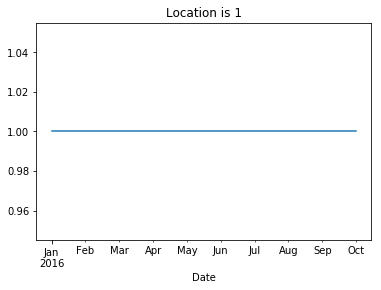

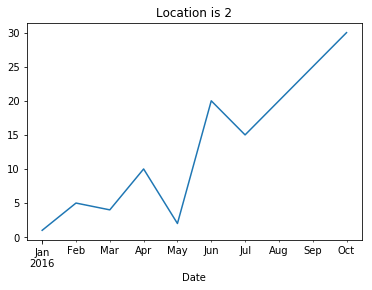

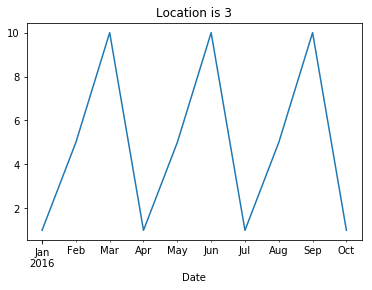

In [15]:
for locat, df_group in df.groupby('Location'):
    fig,ax=plt.subplots()
    df_group.Arsenic.plot(ax=ax)
    title='Location is {}'.format(locat)
    ax.set_title(title)

# Now you can do anything with a complicated data set!  